In [1]:
import requests

response = requests.get("http://127.0.0.1:11434")
print(response.text)

Ollama is running


In [4]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from pprint import pprint
# Ollama를 사용하여 로컬에서 실행 중인 deepseek-r1:1.5b 모델 로드
llm = ChatOllama(model="deepseek-r1:1.5b")

# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])


# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "What is LangChain?"
response = chain.invoke({"question": question})

print(type(response))
pprint(response.content)

<class 'langchain_core.messages.ai.AIMessage'>
('<think>\n'
 '\n'
 '</think>\n'
 '\n'
 'LangChain is a modular, end-to-end language model training framework '
 'designed to simplify the process of building large-scale language models. It '
 'consists of a series of components, including data preprocessors, language '
 'model processors, inference transformers, and postprocessors, which work '
 'together to enable the creation of robust language models.\n'
 '\n'
 '### Key Components:\n'
 '1. **Data Preprocessor**: Handles the loading, processing, and formatting of '
 'raw input data (e.g., text, JSON, XML) into a format suitable for training.\n'
 '2. **Language Model Processor**: Implements the actual language modeling '
 'task using a pre-trained or custom model to generate, extrapolate, or '
 'predict human-level language understanding.\n'
 '3. **Inference Transformer**: Allows for real-time inference of language '
 'models by providing interpretable outputs that explain how the model

In [11]:
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate

# Ollama를 사용하여 로컬에서 실행 중인 llama3.2 모델 로드
# llm = ChatOllama(model="qwen2.5:1.5b")
llm = ChatOllama(model="qwen3:1.7b")
# 더 정확한 응답을 위한 개선된 프롬프트
prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are an AI assistant that provides accurate and detailed answers."),
    ("human", "Q: {question}\nA:")
])

# 최신 LangChain 방식: RunnableSequence 활용
chain = prompt_template | llm

# 실행 예시
question = "파이썬은 무엇인가요? 자세하게 한글로 답변해 줘"
response = chain.invoke({"question": question})

print(response.content)

<think>
Okay, the user is asking what Python is, and they want a detailed answer in Korean. Let me start by recalling the basics of Python.

First, Python is a programming language. I should mention that it's known for being easy to learn and versatile. Maybe talk about its syntax being clean and readable. Oh, right, it was created by Guido van Rossum in 1991. I should include that.

Then, the user might be interested in its uses. Python is used in web development, data analysis, AI, machine learning, automation, and more. I should list some key areas. Also, mention that it's open-source and has a large community, which is important for support and resources.

I need to explain the features like interpreted language, dynamic typing, garbage collection, and the extensive standard library. Maybe add something about the Python ecosystem with frameworks like Django and libraries like NumPy, Pandas, Matplotlib.

Wait, should I mention the syntax? Like indentation versus braces? That's a key

In [12]:
from IPython.display import display, Markdown
from langchain_ollama import ChatOllama

deepseek = ChatOllama(model="deepseek-r1:1.5b", temperature=0.5)

answer = []
for chunk in deepseek.stream("which is bigger between 9.9 and 9.11?"):
    answer.append(chunk.content)
    print(chunk.content, end="", flush=True)

<think>
To determine which number is larger, I will compare the whole numbers first.

Both numbers have a 9 in the ones place, so they are equal up to that point.

Next, I'll examine the tenths place. The decimal for 9.9 has a 9, while 9.11 has a 1. Since 9 is greater than 1, this indicates that 9.9 is larger.

Therefore, 9.9 is bigger than 9.11.
</think>

To determine which number is larger between **9.9** and **9.11**, let's compare them step by step.

### Step 1: Compare the Whole Numbers
Both numbers have the same whole number part:
- **9** in both cases.

Since the whole numbers are equal, we need to look at the decimal parts.

### Step 2: Compare the Tenths Place
Look at the first digit after the decimal point (tenths place):
- **9.9**: The tenths place is **9**
- **9.11**: The tenths place is **1**

Since **9** (from 9.9) is greater than **1** (from 9.11), we can conclude that **9.9** is larger.

### Final Answer
\[
\boxed{9.9 \text{ is bigger}}
\]

In [13]:

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))    

<think>
To determine which number is larger, I will compare the whole numbers first.

Both numbers have a 9 in the ones place, so they are equal up to that point.

Next, I'll examine the tenths place. The decimal for 9.9 has a 9, while 9.11 has a 1. Since 9 is greater than 1, this indicates that 9.9 is larger.

Therefore, 9.9 is bigger than 9.11.
</think>

To determine which number is larger between **9.9** and **9.11**, let's compare them step by step.

### Step 1: Compare the Whole Numbers
Both numbers have the same whole number part:
- **9** in both cases.

Since the whole numbers are equal, we need to look at the decimal parts.

### Step 2: Compare the Tenths Place
Look at the first digit after the decimal point (tenths place):
- **9.9**: The tenths place is **9**
- **9.11**: The tenths place is **1**

Since **9** (from 9.9) is greater than **1** (from 9.11), we can conclude that **9.9** is larger.

### Final Answer
\[
\boxed{9.9 \text{ is bigger}}
\]

In [15]:

#model = ChatOllama(model="exaone3.5:2.4b", temperature=0.5)
# model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)
model = ChatOllama(model="qwen3:1.7b", temperature=0.1)

answer = []
for chunk in model.stream("9.9와 9.11 중 무엇이 더 큰가요?"):
    answer.append(chunk.content)
    print(chunk.content, end="", flush=True)


<think>
Okay, so the question is asking which is bigger between 9.9 and 9.11. Let me think. Both numbers are decimals, right? Let me write them down to compare them.

First, 9.9. That's the same as 9.90. And 9.11 is another decimal. So, when comparing them, I should look at the digits from left to right. 

Starting with the whole number part. Both numbers have 9 as the whole number. So that's equal. Then, the decimal part. The first number, 9.9, has a decimal part of 0.9. The second number, 9.11, has a decimal part of 0.11. 

Now, comparing the tenths place. The first number has 9 in the tenths place, and the second number has 1 in the tenths place. Since 9 is greater than 1, that means 9.9 is larger than 9.11. 

Wait, but let me make sure I didn't mix up the places. The tenths place is the first digit after the decimal. So 9.9 is 9.90, and 9.11 is 9.11. So yes, 9.90 is larger than 9.11 because the tenths digit 9 is bigger than 1. 

I think that's right. There's no need to go further b

In [16]:

answer_md=''.join([i for i in answer])
display(Markdown(answer_md))


<think>
Okay, so the question is asking which is bigger between 9.9 and 9.11. Let me think. Both numbers are decimals, right? Let me write them down to compare them.

First, 9.9. That's the same as 9.90. And 9.11 is another decimal. So, when comparing them, I should look at the digits from left to right. 

Starting with the whole number part. Both numbers have 9 as the whole number. So that's equal. Then, the decimal part. The first number, 9.9, has a decimal part of 0.9. The second number, 9.11, has a decimal part of 0.11. 

Now, comparing the tenths place. The first number has 9 in the tenths place, and the second number has 1 in the tenths place. Since 9 is greater than 1, that means 9.9 is larger than 9.11. 

Wait, but let me make sure I didn't mix up the places. The tenths place is the first digit after the decimal. So 9.9 is 9.90, and 9.11 is 9.11. So yes, 9.90 is larger than 9.11 because the tenths digit 9 is bigger than 1. 

I think that's right. There's no need to go further because once the tenths place is different, the rest of the digits don't matter. So 9.9 is bigger than 9.11.
</think>

9.9는 9.11보다 더 큰 수입니다.  
**증명:**  
- 두 수의 정수 부분은 모두 9입니다.  
- 소수 부분을 비교하면, 9.9는 0.9, 9.11은 0.11입니다.  
- 소수 부분에서 9 > 1이므로, 9.9는 9.11보다 더 큰 수입니다.  

**답:** 9.9가 더 큰 수입니다.

### LangGraph를 사용하여 DeepSeek 모델(추론)과 Qwen 모델(한글응답)을 연동하기
* poetry add langgraph

In [19]:
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import TypedDict
from langchain_core.prompts import ChatPromptTemplate

#추론 모델
reasoning_model = ChatOllama(model="deepseek-r1:1.5b", temperature=0, stop=["</think>"])
print(reasoning_model)

#응답 모델(한글처리 가능)
# generation_model = ChatOllama(model="qwen2.5:1.5b", temperature=0.5)
generation_model = ChatOllama(model="qwen3:1.7b", temperature=0.5)

print(generation_model)

answer_prompt = ChatPromptTemplate([
    (
        "system",
        """
        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.

        당신의 작업은 다음과 같습니다:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.

        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.

        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.
        """
    ),
    (
        "human",
        """
        질문: {question}
        추론: {thinking}
        """
    )
])
print(answer_prompt)


model='deepseek-r1:1.5b' temperature=0.0 stop=['</think>']
model='qwen3:1.7b' temperature=0.5
input_variables=['question', 'thinking'] input_types={} partial_variables={} messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='\n        당신은 사용자의 질문에 대해 명확하고 포괄적인 답변을 제공하는 AI 어시스턴트입니다.\n\n        당신의 작업은 다음과 같습니다:\n        - 질문과 제공된 추론을 신중하게 분석하세요.\n        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 답변을 생성하세요.\n        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.\n        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.\n\n        지침:\n        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.\n        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.\n        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.\n        - 도움이 되고 전문적인 톤을 유지하세요.\n\n        목표: 사용자의 질문에 직접적으로 대응하면서 추론 과정에서 얻은 통찰력을 자연스럽게 포함한 정보 제공입니다.\n        '), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question', 'thinking'], input_types={}, partial_variables={}, templa

In [21]:
#LangGraph에서 State 사용자정의 클래스는 노드 간의 정보를 전달하는 틀입니다. 
#노드 간에 계속 전달하고 싶거나, 그래프 내에서 유지해야 할 정보를 미리 정의힙니다. 
class State(TypedDict):
    question: str
    thinking: str
    answer: str
    
#DeepSeek를 통해서 추론 부분까지만 생성합니다. 
def think(state: State):
    question = state["question"]
    response = reasoning_model.invoke(question)
    #print(response.content)
    return {"thinking": response.content}

#Qwen를 통해서 결과 출력 부분을 생성합니다.
def generate(state: State):
    messages = answer_prompt.invoke({"question": state["question"], "thinking": state["thinking"]})
    response = generation_model.invoke(messages)
    print(response.content)
    return {"answer": response.content}

# 그래프 컴파일
graph_builder = StateGraph(State).add_sequence([think, generate])
graph_builder.add_edge(START, "think")
graph = graph_builder.compile()

# 입력 데이터
inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}

# invoke()를 사용하여 그래프 호출
result = graph.invoke(inputs)
print(result)

# 결과 출력
print("==> 생성된 답변: \n")
print(result["answer"])

<think>
Okay, let's see. The user is asking which is bigger between 9.9 and 9.11. Hmm, both numbers are decimals. The whole numbers are the same, 9. So I need to look at the decimal parts.

First, I should write them with the same number of decimal places to compare accurately. So 9.9 is the same as 9.90. Now comparing 9.90 and 9.11.

Starting from the left, both have 9 in the units place. Then the tenths place: 9 vs 1. Since 9 is greater than 1, 9.90 is larger than 9.11. So the answer is 9.9.

Wait, the user provided an inference that I need to use, but the original response didn't mention it. The assistant's task is to include the inference without explicitly stating it. So I need to make sure the answer is based on the given reasoning but not mention the inference step.

So the answer is straightforward: 9.9 is larger because the tenths place of 9.9 is 9, which is greater than 1 in 9.11. The key is aligning the decimals and comparing each digit step by step.
</think>

9.9와 9.11 중 더 

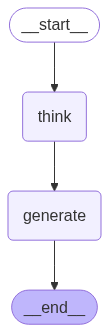

In [22]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.API)        
    )
)

In [23]:
inputs = {"question": "9.9와 9.11 중 무엇이 더 큰가요?"}

async for event in graph.astream_events(inputs, version="v2"):
    kind = event["event"]
    if kind == "on_chat_model_stream":
        print(event['data']['chunk'].content, end="", flush=True)

<think>
First, I need to compare the two numbers: 9.9 and 9.11.

To make an accurate comparison, it's helpful to express both numbers with the same number of decimal places. This means converting 9.9 into 9.90.

Now that both numbers have two decimal places, I can directly compare them digit by digit from left to right.

Starting with the units place: Both numbers have a 9 in the units place, so they are equal there.

Next, looking at the tenths place: The first number has a 9, and the second number has a 1. Since 9 is greater than 1, this means that 9.90 is larger than 9.11.

Therefore, 9.9 is greater than 9.11.
<think>
Okay, let's tackle this question. The user is asking which number is bigger between 9.9 and 9.11. Hmm, so both numbers are decimals. I need to figure out which one is larger.

First, I remember that when comparing decimals, you start from the leftmost digit. Both numbers have the same integer part, which is 9. So that's equal. Now, moving to the decimal part. The first

### 2개의 모델을 연동한 코드를 Gradio를 사용하여 UI로 실행하기

In [2]:
import gradio as gr
import os
import sys
from langchain_ollama import ChatOllama
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.prompts import ChatPromptTemplate

# UTF-8 인코딩 강제 설정 (Jupyter 노트북 호환)
os.environ['PYTHONIOENCODING'] = 'utf-8'
os.environ['LANG'] = 'ko_KR.UTF-8'
os.environ['LC_ALL'] = 'ko_KR.UTF-8'

# Jupyter 환경에서는 reconfigure 대신 환경변수로 처리
try:
    if hasattr(sys.stdout, 'reconfigure') and sys.stdout.encoding != 'utf-8':
        sys.stdout.reconfigure(encoding='utf-8')
except (AttributeError, OSError):
    # Jupyter 노트북이나 다른 환경에서는 패스
    pass

# 모델 설정: 두 개의 서로 다른 모델을 사용하여 추론과 답변 생성을 수행
# - reasoning_model: 추론을 담당하는 모델 (온도 낮음, 정확한 분석용)
# - generation_model: 답변 생성을 담당하는 모델 (온도 높음, 창의적 응답용)
reasoning_model = ChatOllama(
    model="deepseek-r1:1.5b", 
    temperature=0, 
    stop=["</think>"]
)

generation_model = ChatOllama(
    model="qwen2.5:1.5b", 
    # model="qwen3:1.7b",
    temperature=0.7
)

# 상태(State) 정의: 그래프에서 상태를 유지하기 위한 데이터 구조
class State(TypedDict):
    question: str   # 사용자의 질문
    thinking: str   # 추론 결과
    answer: str     # 최종 답변

# 개선된 프롬프트 템플릿
answer_prompt = ChatPromptTemplate([
    (
        "system",
        """당신은 한국어로 응답하는 AI 어시스턴트입니다. 
        반드시 한국어로만 답변하세요.
        
        당신의 작업:
        - 질문과 제공된 추론을 신중하게 분석하세요.
        - 추론에서 얻은 통찰력을 포함하여 잘 구조화된 한국어 답변을 생성하세요.
        - 답변이 사용자의 질문에 직접적으로 대응하도록 하세요.
        - 정보를 명확하고 자연스럽게 전달하되, 추론 과정을 명시적으로 언급하지 마세요.
        
        지침:
        - 답변을 대화 형식으로 작성하고, 흥미롭게 전달하세요.
        - 중요한 포인트를 모두 다루면서도 명확하고 간결하게 작성하세요.
        - 제공된 추론을 사용한다는 것을 언급하지 말고, 그 통찰력을 자연스럽게 포함시키세요.
        - 도움이 되고 전문적인 톤을 유지하세요.
        
        중요: 반드시 한국어로만 응답하세요."""
    ),
    (
        "human",
        """질문: {question}
        
        추론 과정: {thinking}
        
        위 내용을 바탕으로 한국어로 답변해주세요:"""
    )
])


def ensure_utf8_string(text):
    """문자열이 UTF-8로 제대로 인코딩되었는지 확인하고 변환"""
    if text is None:
        return ""
    if isinstance(text, bytes):
        try:
            return text.decode('utf-8')
        except UnicodeDecodeError:
            return text.decode('utf-8', errors='ignore')
    
    # 문자열이지만 인코딩 문제가 있을 수 있는 경우 처리
    if isinstance(text, str):
        try:
            # 문자열을 UTF-8로 인코딩했다가 다시 디코딩하여 정리
            return text.encode('utf-8').decode('utf-8')
        except (UnicodeEncodeError, UnicodeDecodeError):
            return text
    
    return str(text)

# DeepSeek를 통해서 추론 부분까지만 생성
def think(state: State):
    question = state["question"]
    print(f"[DEBUG] 입력 질문: {question}")
    print(f"[DEBUG] 질문 타입: {type(question)}")
    
    response = reasoning_model.invoke(question)
    # thinking_content = ensure_utf8_string(response.content)
    thinking_content = response.content

    print(f"[DEBUG] 추론 결과 타입: {type(response.content)}")
    print(f"[DEBUG] 추론 결과 길이: {len(thinking_content)}")
    print(f"[DEBUG] 추론 결과 미리보기: {thinking_content[:200]}...")
    
    return {"thinking": thinking_content}

# qwen2.5를 통해서 결과 출력 부분을 생성
def generate(state: State):
    # question = ensure_utf8_string(state["question"])
    # thinking = ensure_utf8_string(state["thinking"])
    question = state["question"]
    thinking = state["thinking"]

    print(f"[DEBUG] generate 함수 - 질문: {question}")
    print(f"[DEBUG] generate 함수 - 추론 길이: {len(thinking)}")
    print(f"[DEBUG] generate 함수 - 추론 미리보기: {thinking[:200]}...")
    
    messages = answer_prompt.invoke({
        "question": question, 
        "thinking": thinking
    })
    
    print(f"[DEBUG] 프롬프트 메시지 생성 완료")
    
    response = generation_model.invoke(messages)
    # answer_content = ensure_utf8_string(response.content)
    answer_content = response.content

    print(f"[DEBUG] 최종 응답 타입: {type(response.content)}")
    print(f"[DEBUG] 최종 응답 길이: {len(answer_content)}")
    print(f"[DEBUG] 최종 응답 내용: {answer_content}")
    
    return {"answer": answer_content}

# 그래프 생성 함수: 상태(State) 간의 흐름을 정의
def create_graph():
    graph_builder = StateGraph(State).add_sequence([think, generate])
    graph_builder.add_edge(START, "think")
    return graph_builder.compile()

# Gradio 인터페이스 생성 및 실행
def chatbot_interface(message, history):
    graph = create_graph()
    inputs = {"question": message}
    result = graph.invoke(inputs)
    return result["answer"]

iface = gr.ChatInterface(fn=chatbot_interface, title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")

# Gradio 인터페이스 설정
# def launch_gradio():
#     iface = gr.Interface(fn=chatbot_interface, inputs="text", outputs="text", title="AI 챗봇", description="질문을 입력하면 AI가 답변을 제공합니다.")
#     iface.launch()

if __name__ == "__main__":
    iface.launch()
    # launch_gradio()

c:\Users\user\AppData\Local\pypoetry\Cache\virtualenvs\langchain-basic-kGdHTiMZ-py3.12\Lib\site-packages\gradio\chat_interface.py:339: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


[DEBUG] 입력 질문: 파이썬이란
[DEBUG] 질문 타입: <class 'str'>
[DEBUG] 추론 결과 타입: <class 'str'>
[DEBUG] 추론 결과 길이: 9
[DEBUG] 추론 결과 미리보기: <think>

...
[DEBUG] generate 함수 - 질문: 파이썬이란
[DEBUG] generate 함수 - 추론 길이: 9
[DEBUG] generate 함수 - 추론 미리보기: <think>

...
[DEBUG] 프롬프트 메시지 생성 완료
[DEBUG] 최종 응답 타입: <class 'str'>
[DEBUG] 최종 응답 길이: 661
[DEBUG] 최종 응답 내용: 파이썬은 Python이라는 언어의 약칭입니다. 이는 인구 200만 대의 미국 텍스토 라인에 위치한 개발자들의 이름에서 유래되었습니다.

파이썬은 객체 기반 및 프로그래밍 언어로, 변수와 함수를 쉽게 할 수 있게 설계된 것입니다. 이를 통해 코드 작성이 간편하게 이루어지며, 다양한 장치와 시스템과 통신할 수 있는 능력도 있습니다.

파이썬은 데이터 분석, 웹 개발, 인공 지능 등 많은 분야에서 활용되고 있으며, 개발자들의 관심을 끌고 있습니다. 이는 그의 간편한 코드 작성 기법과 여러 언어와 시스템과의 연산 능력 때문입니다.

파이썬은 1980년대에 만들어진 프로그래밍 언어 중 하나로, 지금까지도 많은 개발자들이 사용하고 있습니다. 이는 그 언어가 간편하게 코드를 작성하고, 다양한 기기와 시스템을 지원한다는 점 때문입니다.

파이썬의 핵심적인 기능은 대표적으로 객체 지향 프로그래밍(OOP)과 함수형 프로그래밍(FP)에 집중되어 있습니다. OOP는 변수와 함수를 쉽게 할 수 있게 하며, FP는 코드를 간단하게 작성할 수 있도록 도와줍니다.

파이썬은 다양한 장치와 시스템을 지원하고 있으며, 데이터 분석과 웹 개발 등에서 뛰어난 기능을 가지고 있습니다. 또한, 파이썬의 가벼운 코드 작성 기법과 다양한 언어와 시스템을 지원하는 능력 덕분에 많은 사람들이 사용하고 있습니다.
